### Required

To run this you will need to run 
```Bash
pip3 install EasyNN
pip3 install h5py
```

#### or  
```
pip3 install -r requirements.txt
```

## Dataset
Dataset was pulled from Caltech. Machine learning of optical properties of materials - predicting spectra from images and images from spectra.

**Authors**
Gregoire, John Caltech 0000-0002-2863-5265 ORCID  
Stein, Helge Caltech  
Soedarmadji, Edwin Caltech  
Newhouse, Paul Caltech  
Guevarra, Dan Caltech  

**URL**
https://data.caltech.edu/records/1103

In [1]:
from EasyNN.utilities import download

download("dataset_raw.h5","https://bit.ly/34xI5LW")
download("training_raw.txt","https://bit.ly/3rpWZwP")
download("test_raw.txt","https://bit.ly/34xOneu")

'test_raw.txt'

In [2]:
import numpy as np
import pandas as pd
import h5py

hf = h5py.File('dataset_raw.h5', 'r')
list(hf.keys())

['atfrac',
 'atfrac_keys',
 'energy_eV',
 'images',
 'loading_keys',
 'loadings',
 'plate_id',
 'sample_id',
 'spectra']

In [3]:
images = hf['images']
print(images.shape)

(180902, 64, 64, 3)


Show me a sample image.

In [11]:
import matplotlib.pyplot as plt
from math import isqrt

def show(image:list[float]):
    """
    Show dataset image.

        Example:
            hf = h5py.File('dataset_raw.h5', 'r')
            images = hf['images']
            show(images[0])
            >>> Shows image plotted using matplotlib

        Parameters:
            image - Numpy array of floats.

        Returns:
            Matplotlib plotted image.
    """

    # Flatten the array into the proper rgb format.
    image = image.flatten('F')

    # Check if the size of the array is in the correct size to be devided by three.
    img_size = isqrt(image.size // 3)

    if 3 * img_size**2 != image.size:
        raise ValueError(f"Can't convert image of size {image.size} to a square rgb image")
    
    # Divide the array into three sections.
    im_r, im_g, im_b = image.reshape(3, img_size, img_size)

    # Stack the image to make an rgb image.
    img = np.dstack((im_r, im_g, im_b))
    
    # Plot the image.
    plt.imshow(img) 
    plt.show()


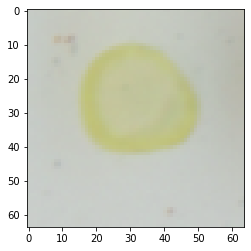

In [14]:
show(images[0])